<b>Phase 2 Assignment</b><br></br>
<i>KMeans algorithm </i><br>
<b>Dataset: </b>breast cancer data from the phase 1<br>

In [3]:
#import all required libraries

%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

<b>Load and print head of dataset</b>

In [42]:
df = pd.read_csv('../data/BreastCancerWisconsin.csv') 
print(df[20:30])
df['A7'] = df['A7'].replace('?', np.NaN)
df['A7'] = pd.to_numeric(df['A7'])
df = df.fillna(df.mean(skipna=True))
print(df[20:30])

        Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10   5   4    4      4
21  1054593  10   5   5   3   6   7   7  10    1      4
22  1056784   3   1   1   1   2   1   2   1    1      2
23  1057013   8   4   5   1   2   ?   7   3    1      4
24  1059552   1   1   1   1   2   1   3   1    1      2
25  1065726   5   2   3   4   2   7   3   6    1      4
26  1066373   3   2   1   1   1   1   2   1    1      2
27  1066979   5   1   1   1   2   1   2   1    1      2
28  1067444   2   1   1   1   2   1   2   1    1      2
29  1070935   1   1   3   1   2   1   1   1    1      2
        Scn  A2  A3  A4  A5  A6         A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10.000000   5   4    4      4
21  1054593  10   5   5   3   6   7.000000   7  10    1      4
22  1056784   3   1   1   1   2   1.000000   2   1    1      2
23  1057013   8   4   5   1   2   3.544656   7   3    1      4
24  1059552   1   1   1   1   2   1.000000   3   1    1      2
25  10

<b>Get only A2-A10 colums from Dataset</b>

In [43]:
df = df.iloc[:, 1:10]
print(df.head(10))

   A2  A3  A4  A5  A6    A7  A8  A9  A10
0   5   1   1   1   2   1.0   3   1    1
1   5   4   4   5   7  10.0   3   2    1
2   3   1   1   1   2   2.0   3   1    1
3   6   8   8   1   3   4.0   3   7    1
4   4   1   1   3   2   1.0   3   1    1
5   8  10  10   8   7  10.0   9   7    1
6   1   1   1   1   2  10.0   3   1    1
7   2   1   2   1   2   1.0   3   1    1
8   2   1   1   1   2   1.0   1   1    5
9   4   2   1   1   2   1.0   2   1    1


<b>Create KMeans model for n_cluster = 4<br>
Fit model to the data<br>
Calculate centroids<br>
Print centroids - you should have a matrix with 4 row (4 clusters) and 9  columns (for each A column)<br></b>

In [44]:
model = KMeans(n_clusters=4)
# fit kmeans object to data df
model.fit(df)
labels = model.predict(df)
centroids = model.cluster_centers_
print(centroids)

[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]]


<b>Find the optimal number of clusters</b>

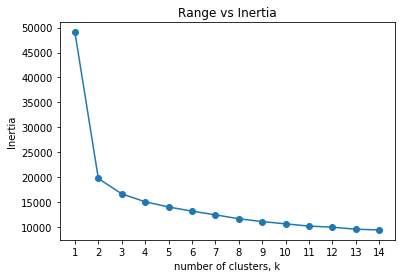

In [45]:
#Calulate Inertia
# make a range
ks = range(1, 15)

inertias = [] # empty list

# do a for loop
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(df)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

In [55]:
from statistics import stdev
print (df.std())

A2     2.815741
A3     3.051459
A4     2.971913
A5     2.855379
A6     2.214300
A7     3.601852
A8     2.438364
A9     3.053634
A10    1.715078
dtype: float64


<b>Plot standard deviation values</b>

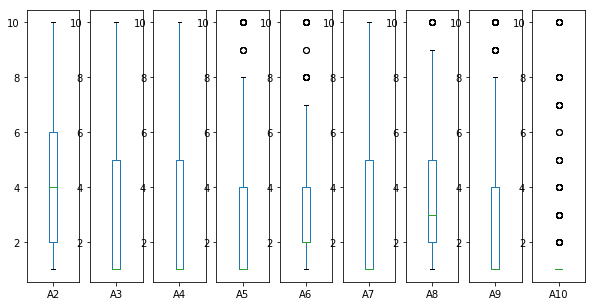

In [57]:
df.plot(kind='box',figsize=(10,5),subplots=True)
plt.show()

<b>Implement normalization</b>

In [60]:
#Perform normalization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
# Create KMeans instance: kmeans
model = KMeans(n_clusters=4) # we are using 4 here because our dataset was created with 4 clusters initially. 
#In your real dataset use the best optimal number you have selected using Inertias.
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,model)
pipeline.fit(df)
labels = pipeline.predict(df)
centroids = model.cluster_centers_
print(centroids)

[[-0.53059927 -0.62163609 -0.62335953 -0.53244915 -0.53656327 -0.61138714
  -0.57009135 -0.54657241 -0.30647603]
 [ 0.96467674  1.61728901  1.52800355  1.22158268  1.36049678  0.98526266
   1.39226519  1.49048593  0.05791975]
 [ 1.14390108  1.74469885  1.75662587  1.55451627  1.87444506  1.14523385
   1.38733752  1.54313739  3.88190804]
 [ 0.92431852  0.48122053  0.57242108  0.55444642  0.33756717  1.24181879
   0.59554669  0.35310822  0.03967321]]
